<a href="https://colab.research.google.com/github/nobertomaciel/AI-UNIFACS/blob/main/k-means/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo K-Means**
## **Documentação das bibliotecas utilizadas:**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://seaborn.pydata.org/

https://matplotlib.org/

In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import pandas as pd

df = pd.read_csv("iris_unlabeled.csv")

print(df.columns)

X = df[['petal length (cm)', 'petal width (cm)']]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [16]:
pca = PCA(n_components=2, random_state=0)
X_work = pca.fit_transform(X)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [18]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=25,
    max_iter=500,
    random_state=38
)
kmeans.fit(X)
labels = kmeans.labels_


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_seed = None
best_model = None

for seed in range(1, 200):
    km = KMeans(n_clusters=3, init='k-means++', n_init=50, max_iter=500, random_state=seed, algorithm='lloyd')
    km.fit(X)
    score = silhouette_score(X, km.labels_)

    if score > best_score:
        best_score = score
        best_seed = seed
        best_model = km

print(f"Melhor seed: {best_seed} | Score: {best_score:.4f} | Iterações: {best_model.n_iter_}")




Melhor seed: 1 | Score: 0.6760 | Iterações: 3


In [20]:
#Visualizacao
df = pd.DataFrame(X, columns=['petal length (cm)', 'petal width (cm)'])
df['Cluster'] = labels

In [21]:
#Forcar 1 interacao
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

centros = best_model.cluster_centers_

km_final = KMeans(
    n_clusters=3,
    init=centros,
    n_init=1,
    max_iter=1,   #<--altera aqui
    algorithm='lloyd',
    random_state=best_seed
)
km_final.fit(X)

score_final = silhouette_score(X, km_final.labels_)
print(f"[FINAL] Interações={km_final.n_iter_} | Score={score_final:.4f}")




[FINAL] Interações=1 | Score=0.6760


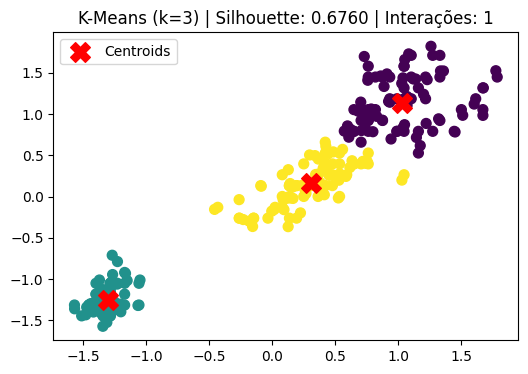

In [22]:
X = df[['petal length (cm)','petal width (cm)']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pet_scaled = scaler.fit_transform(X)

best_score, best_model, best_seed = -1, None, None
for seed in range(1,200):
    km = KMeans(n_clusters=3, init='k-means++', n_init=50, max_iter=500, random_state=seed)
    km.fit(X_pet_scaled)
    s = silhouette_score(X_pet_scaled, km.labels_)
    if s > best_score: best_score, best_model, best_seed = s, km, seed

centros = best_model.cluster_centers_
km_final = KMeans(n_clusters=3, init=centros, n_init=1, max_iter=1, random_state=best_seed)
km_final.fit(X_pet_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pet_scaled[:,0], X_pet_scaled[:,1], c=km_final.labels_, cmap='viridis', s=50)
plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means (k=3) | Silhouette: {silhouette_score(X_pet_scaled, km_final.labels_):.4f} | Interações: {km_final.n_iter_}")
plt.legend(); plt.show()
